### This important step is to add the path of your virtual environment site packages to the system path.

In [1]:
import sys

sys.path.append('/home/juanagreda/anaconda3/lib/python3.8/site-packages')

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [3]:
df = pd.read_csv('day.csv')

df.shape

(731, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# We'll use the t-test to determine whether the effect of working day and the temperature on the number of bikes that were rented is significant

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Because of we will use the original dataset later, we only will keep the columns necesary to do the t-test

In [6]:
df = df[['season', 
         'mnth',
         'holiday', 
         'workingday', 
         'weathersit', 
         'temp', 
         'cnt']]

### Save the new dataset, in to csv file.

In [7]:
df.to_csv('bike_sharing_data_processed.csv', index=False)

In [8]:
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [9]:
df['season'].nunique()

4

### Season has 4 unique values

### 1.Spring 2.Summer 3.Fall 4.Winter

In [10]:
df['season'].unique()

array([1, 2, 3, 4])

In [11]:
df['workingday'].unique()

array([0, 1])

In [12]:
df['holiday'].unique()

array([0, 1])

In [13]:
df['weathersit'].unique()

array([2, 1, 3])

### weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered      clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
df['temp'].nunique()

499

In [15]:
df['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

### Groupby, to compare data of features with functions

In [16]:
df.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


### 0. No working day, 1.working day

<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

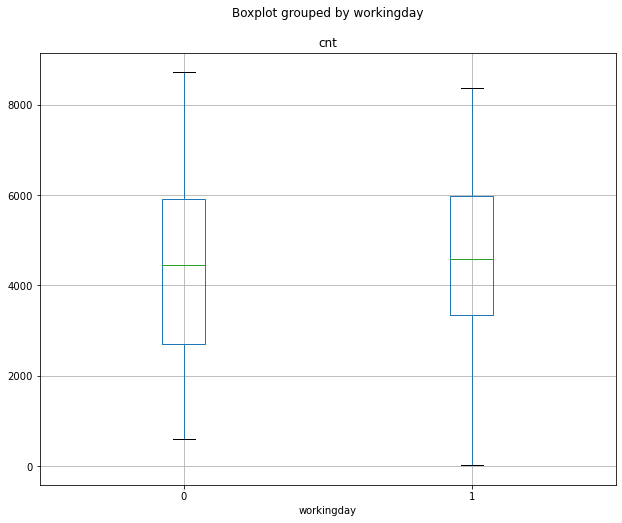

In [17]:
df.boxplot(column=['cnt'], by='workingday', figsize=(10, 8))

In [76]:
sample_01 = df[(df['workingday'] == 1)]

sample_02 = df[(df['workingday'] == 0)]

In [77]:
sample_01.shape, sample_02.shape

((500, 8), (231, 8))

In [78]:
sample_01 = sample_01.sample(231)

sample_01.shape, sample_02.shape

((231, 8), (231, 8))

### For t-test we need both of the sample sizes to be the same

### Levene's test to check whether the *variance* of the two grps are the same, like t-test but for VARIANCE

In [79]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=3.435568560896823, pvalue=0.06444666626734163)

## The hypothesis being tested

* __Null hypothesis (H0): Var Sample_1 = Var Sample_2, which translates to the variance of `sample_01` is equal to the variance of `sample 02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the variance of `sample01` is not equal to `sample 02`__

### - p-value = 0.09 > 0.05, reject H1, accept H0, variance 01 is equal to variance 02

### - p-value = 0.02 < 0.05, reject H0, so accept H1, variance 01 is not equal variance 02, the is a difference between the variance in the population

(array([ 3.,  7., 19., 39., 49., 36., 44., 19., 10.,  5.]),
 array([-2.71142227, -2.18022169, -1.64902111, -1.11782053, -0.58661994,
        -0.05541936,  0.47578122,  1.00698181,  1.53818239,  2.06938297,
         2.60058355]),
 <BarContainer object of 10 artists>)

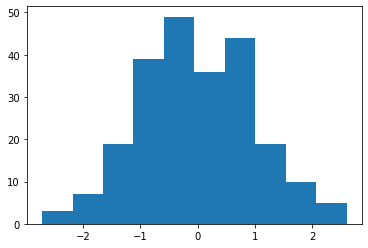

In [80]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=float))

plt.hist(diff)

### The scale function will standardize the results, so will subtracts the mean from every value that we have and devides by the stantard deviation

### Residuals is calculate by the differences between sample01 - sample02

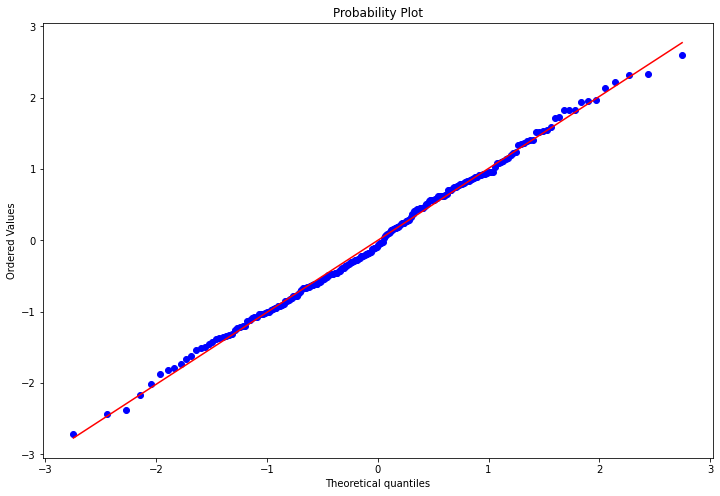

In [81]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

### QQ-PLOT, PROBABILITY PLOT

In [82]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9958690404891968, pvalue=0.7967422008514404)

### p-value = 0.66 > 0.05,reject H1, accept H0, population is normally distributed

In [83]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.3117944839503846, pvalue=0.19024377736736153)

### p-value = 0.8 > 0.05, reject H1, accept H0, there is no difference between the means of these two grps

### we can say that whether its a working day or not has no effect on the number of bikes shared


In [84]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [85]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4569.852814,1870.979236,123.101396,4327.302222,4812.403406
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4450.010823,1965.185104,91.428685,4270.342190,4629.679455


In [86]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   239.6840
1      Degrees of freedom =   460.0000
2                       t =     1.3118
3   Two side test p value =     0.1902
4  Difference < 0 p value =     0.9049
5  Difference > 0 p value =     0.0951
6               Cohen's d =     0.1221
7               Hedge's g =     0.1219
8           Glass's delta =     0.1281
9             Pearson's r =     0.0610


### p-value = 0.8 > 0.05, reject H1, accept H0, there is no difference between the means of these two populations

### the number of bikes shared is not significantly impacted by whether its a working day or not

# Now we want to know if temperature in a particular day is significant to rent bikes

In [29]:
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


<AxesSubplot:>

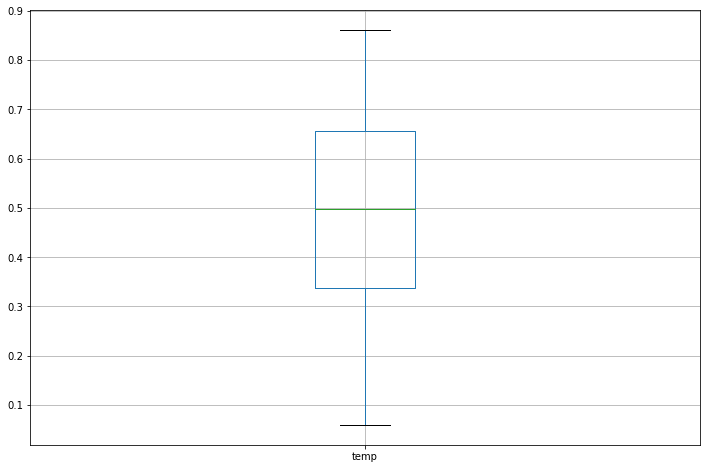

In [31]:
df[['temp']].boxplot(figsize=(12, 8))

In [33]:
df['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

### Add new column "temp_category", contains true,false, above and below mean 

In [34]:
df['temp_category'] = df['temp'] > df['temp'].mean()

### To see random values of the dataset, we use .sample()

In [39]:
df.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
275,4,10,0,1,2,0.384167,3570,False
164,2,6,0,1,1,0.604167,4891,True
88,2,3,0,1,2,0.300000,1536,False
485,2,4,0,1,2,0.464167,5572,False
84,2,3,0,0,1,0.265833,2496,False
295,4,10,0,0,1,0.421667,4381,False
413,1,2,0,0,1,0.346667,4318,False
43,1,2,0,0,1,0.316522,1589,False
442,1,3,0,0,2,0.472500,5892,False
32,1,2,0,1,2,0.260000,1526,False


### Hot day --> True, Above the mean,  Cold day --> False, below mean

In [41]:
df.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


### df.groupby('v.independent')['v.dependent']

<AxesSubplot:title={'center':'cnt'}, xlabel='temp_category'>

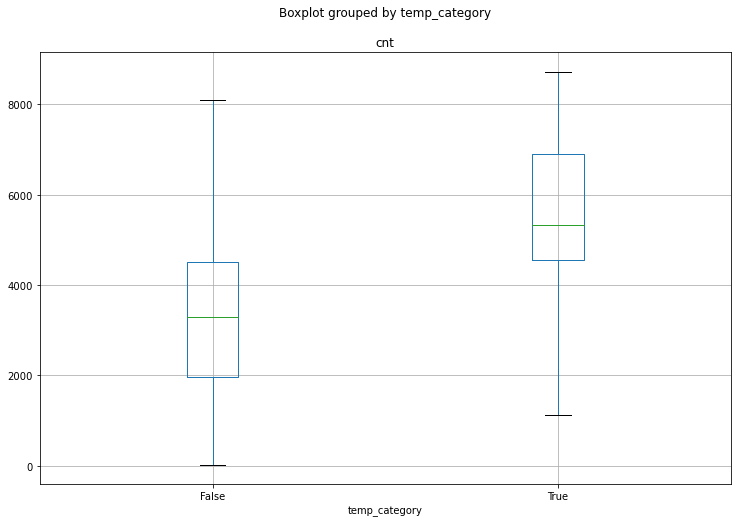

In [43]:
df.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

### We use boxplot to observe the difference between the means

### .boxplot(column=['response'], by='feature')

In [44]:
sample_01 = df[(df['temp_category'] == True)]

sample_02 = df[(df['temp_category'] == False)]

In [45]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [46]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

# Firs Assumption, equal variance

In [49]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.816998102104189, pvalue=0.028496358947880596)

### p-value = 0.02 < 0.05, reject H0, accept H1, Variance not equal

# Second Assumption, Normal distribution of residuals

(array([ 4.,  1.,  7., 23., 61., 94., 71., 46., 41., 16.]),
 array([-3.45070278, -2.87886466, -2.30702655, -1.73518843, -1.16335032,
        -0.5915122 , -0.01967408,  0.55216403,  1.12400215,  1.69584026,
         2.26767838]),
 <BarContainer object of 10 artists>)

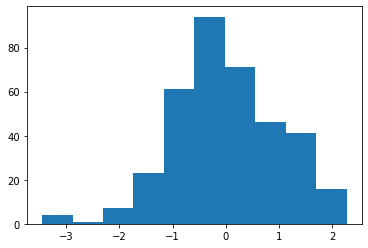

In [50]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))

plt.hist(diff)

### we can observe that the residuals show normal distribution

### now we want to use pobability plot or QQ-plot

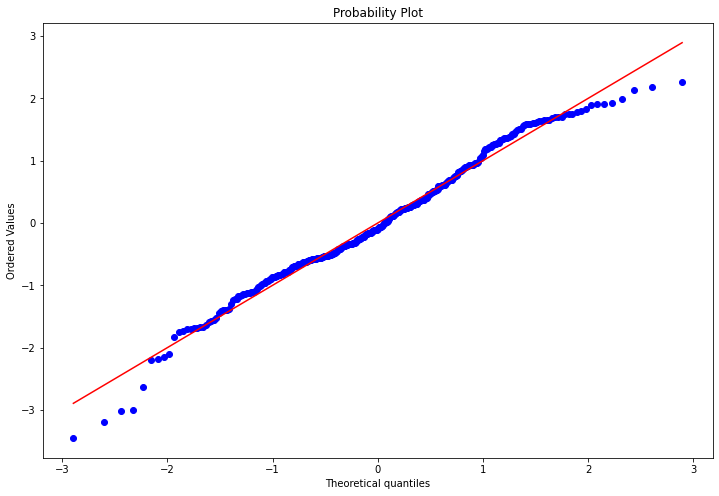

In [61]:
plt.figure(figsize=(12, 8))
stats.probplot(diff, plot=plt)
plt.show()

### .probplot, shows us that the residuals between the 2 grps is normally distributed

In [63]:
stats.shapiro(diff)

ShapiroResult(statistic=0.986050546169281, pvalue=0.0014047350268810987)

### Shapiro test shows, p-value = 0.001 < 0.05, reject H0, accept H1, The residuals are not normally distributed

### we have differences in the results, 

## We have to perform an independent t-test, using .ttest_ind

In [65]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.938282587158795, pvalue=2.624505891356301e-65)

### shows that test results are significant,

### p-value = 0.000002 < 0.05, reject H0 (no difference), accept H1 (difference),  there is a statistically significant difference between the means in two groups.

## Welch's t-test

Welch’s Test for Unequal Variances t) is a modification of Student’s t-test to see if two sample means are significantly different

In [67]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [68]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5614.376374,1473.585858,77.236886,5462.488444,5766.264303
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4501.020604,1937.485126,71.807976,4360.044857,4641.996352


### is this difference in means is significant?

### we can observe difference between the two means

In [69]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2226.7115
1      Degrees of freedom =    714.5595
2                       t =     18.9383
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.4038
7               Hedge's g =      1.4023
8           Glass's delta =      1.5111
9             Pearson's r =      0.5781


### p-value clost to cero, very very tiny, and t-statistic is significant

### p-value = 0.00 < 0.05, reject H0 (no difference in means), accept H1(difference in means)

## We can say that temperature of the day (hot or cold) has siginificant impact on the number of bike rented 